In [290]:
import numpy as np
import tensorflow as tf
from data_gen import *
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [291]:
num_features = 2
batch_size = 10
state_size = 4
datatype = tf.float64
num_of_operations = 3


gloabal_seed = round(random.random()*100000)
np.random.seed(gloabal_seed)
tf.set_random_seed(gloabal_seed)
sess = tf.InteractiveSession()

x,y = samples_generator(np_add, (batch_size, num_features) , (-1,1), gloabal_seed)

batchX = tf.Variable(x, dtype=datatype)
state  = tf.Variable(np.zeros([batch_size, state_size]), dtype=datatype)
W      = tf.Variable(np.random.rand(state_size+num_features, state_size), dtype=datatype)
W2     = tf.Variable(np.random.rand(state_size, num_of_operations),dtype=datatype)

batchX.initializer.run()
state.initializer.run()
W.initializer.run()
W2.initializer.run()

In [292]:
def run_pass(batchX, state):
    X_and_state_con = tf.concat([batchX, state], 1)
    print("X_and_state_con")
    print(X_and_state_con.eval())
    layer1          = tf.matmul(X_and_state_con, W)
    print("layer1")
    print(layer1.eval())
    #next_state      = tf.nn.sigmoid(layer1)
    next_state      = tf.nn.relu(layer1)
    print("next_state")
    print(next_state.eval())
    state_dropped = tf.layers.dropout(next_state, 0.15, training = True)
    print("state_dropped")
    print(state_dropped.eval())
    logits = tf.matmul(state_dropped, W2)
    print("logits")
    print(logits.eval())
    softmax = tf.nn.softmax(logits)
    print("softmax")
    print(softmax.eval())
    softmax_loss = skewed_sigmoid_der_tf(softmax, num_of_operations)
    print("softmax_l2_losts")
    print(softmax_loss.eval())
    return softmax, next_state , logits

In [288]:
state1 = run_pass(batchX, state)[1].eval()

X_and_state_con
[[ 0.89749262 -0.6943607   0.          0.          0.          0.        ]
 [ 0.84386033  0.41601411  0.          0.          0.          0.        ]
 [-0.93513139 -0.57574001  0.          0.          0.          0.        ]
 [-0.95596308  0.12270001  0.          0.          0.          0.        ]
 [ 0.87253477  0.19951032  0.          0.          0.          0.        ]
 [ 0.80545725 -0.95879958  0.          0.          0.          0.        ]
 [-0.00466763  0.46814942  0.          0.          0.          0.        ]
 [-0.08253422  0.44456018  0.          0.          0.          0.        ]
 [-0.70365341 -0.32705716  0.          0.          0.          0.        ]
 [-0.65684387 -0.20230199  0.          0.          0.          0.        ]]
layer1
[[ 0.82897171 -0.01014023  0.81213677  0.24565172]
 [ 0.8141025   0.21720751  0.78714028  0.83098859]
 [-0.90587618 -0.26503818 -0.87480275 -0.98527128]
 [-0.90298676 -0.12006159 -0.87862954 -0.60795096]
 [ 0.83428513  0.17566

In [289]:
state2 = run_pass(batchX, state1)[1].eval()

X_and_state_con
[[ 0.89749262 -0.6943607   0.82897171  0.          0.81213677  0.24565172]
 [ 0.84386033  0.41601411  0.8141025   0.21720751  0.78714028  0.83098859]
 [-0.93513139 -0.57574001  0.          0.          0.          0.        ]
 [-0.95596308  0.12270001  0.          0.          0.          0.        ]
 [ 0.87253477  0.19951032  0.83428513  0.17566258  0.80880904  0.72975589]
 [ 0.80545725 -0.95879958  0.73307659  0.          0.72146404  0.03204726]
 [-0.00466763  0.46814942  0.0107557   0.09859523  0.0060047   0.25949096]
 [-0.08253422  0.44456018  0.          0.0816917   0.          0.19111905]
 [-0.70365341 -0.32705716  0.          0.          0.          0.        ]
 [-0.65684387 -0.20230199  0.          0.          0.          0.        ]]
layer1
[[ 1.87004162  0.83450039  1.74510917  0.68375126]
 [ 2.29018067  1.38076873  1.90996037  1.64707193]
 [-0.90587618 -0.26503818 -0.87480275 -0.98527128]
 [-0.90298676 -0.12006159 -0.87862954 -0.60795096]
 [ 2.25220798  1.29754

In [266]:
state3 = run_pass(batchX, state2)[1].eval()

X_and_state_con
[[ 0.44091025  0.42425323  1.47515833  0.97007042  1.31532599  1.32058083]
 [-0.73810525 -0.38387443  0.          0.          0.          0.        ]
 [-0.87574808 -0.63832508  0.          0.          0.          0.        ]
 [ 0.53954193  0.59098006  1.91522363  1.22926866  1.75347949  1.76735475]
 [ 0.55138126 -0.53632042  0.7278264   0.66778806  0.          0.        ]]
layer1
[[ 4.06478042  2.04050055  3.08844842  3.10772039]
 [-0.55562028 -0.59504327 -0.39214833 -0.53275104]
 [-0.67059375 -0.7390766  -0.60604103 -0.77756663]
 [ 5.33460303  2.61735431  4.07551804  4.13341274]
 [ 1.11280909  1.11431155  0.27274658  0.0152782 ]]
next_state
[[ 4.06478042  2.04050055  3.08844842  3.10772039]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 5.33460303  2.61735431  4.07551804  4.13341274]
 [ 1.11280909  1.11431155  0.27274658  0.0152782 ]]
state_dropped
[[ 0.          0.          3.63346873  3.65614164]
 [ 0.        

In [128]:
#use derivative of sigmoid to penelise for values other than 1 or 0
def sigmoid_der(x, scale = 10):
    shifted_x = x - 0.5
    scaled_x = scale*shifted_x
    res = tf.sigmoid(scaled_x)*(1 - tf.sigmoid(scaled_x))
    return (res - 0.01)*scale**3

In [180]:
def skewed_dist(x, scale=10):
    mean = 0.5
    str_d = mean/3.5
    const = 1/tf.sqrt(2*math.pi*(str_d**2))
    power = ((x-mean)**2) / (2*str_d**2)
    return const*math.exp(-power)*scale**2

In [212]:
def skewed_sigmoid_der(x, scale = 10, num_ops = 3):
    shifted_x = x - 0.5
    scaled_x = scale*shifted_x
    nom = tf.exp(-scaled_x)+num_ops*tf.exp(-num_ops*scaled_x)+(num_ops+1)*tf.exp(-(num_ops+1)*scaled_x)
    denom = tf.square(tf.exp(-scaled_x) + 1)*tf.square(tf.exp(-num_ops*scaled_x) + 1)
    res = nom/denom
    return (res - 0.01)*scale**3

def sigmoid(x, scale = 10, num_ops = 3):
    shifted_x = x - 0.5
    scaled_x = scale*shifted_x
    return tf.sigmoid(scaled_x)*tf.sigmoid(10*scaled_x)

In [230]:
def plot(fn, ops):
    t = np.arange(0.0, 1.01, 0.01)
    s = [fn(val, ops).eval() for val in t]
    plt.plot(t, s)

    plt.xlabel('softmax')
    plt.ylabel('penalty')
    plt.title(fn.__name__ + " "+str(ops))
    plt.grid(True)
    plt.show()

In [274]:
def skewed_sigmoid_der_py(x, num_ops = 3, scale = 10):
    worst_case = 1 / num_ops
    shifted_x = x - worst_case + 0.02
    scaled_x = scale*shifted_x
    nom = scale*math.exp(-scaled_x)+scale*num_ops*math.exp(-num_ops*scaled_x)
    #denom = math.square(math.exp(-scaled_x) + 1)*math.square(math.exp(-(num_ops-1)*scaled_x) + 1)
    denom = ((math.exp(-scaled_x) + 1)**2) * ((math.exp(-(num_ops-1)*scaled_x) + 1)**2)
    res = nom/denom
    return worst_case*((res)*scale**3)

def skewed_sigmoid_der_tf(x, num_ops = 3, scale = 10):
    worst_case = 1 / num_ops
    shifted_x = x - worst_case + 0.02
    scaled_x = scale*shifted_x
    nom = scale*tf.exp(-scaled_x)+scale*num_ops*tf.exp(-num_ops*scaled_x)
    denom = tf.square(tf.exp(-scaled_x) + 1)*tf.square(tf.exp(-(num_ops-1)*scaled_x) + 1)
    res = nom/denom
    return worst_case*((res - 0.01)*scale**3)

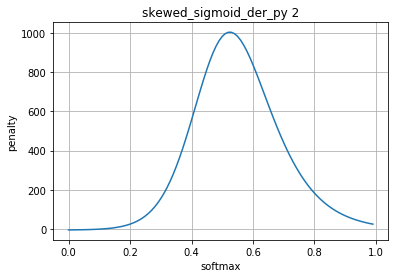

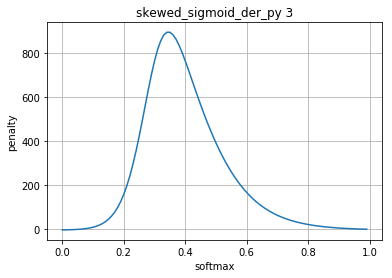

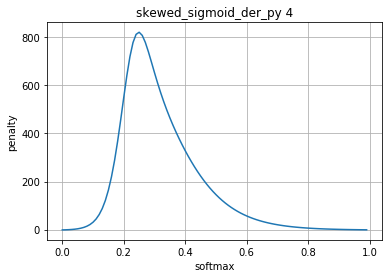

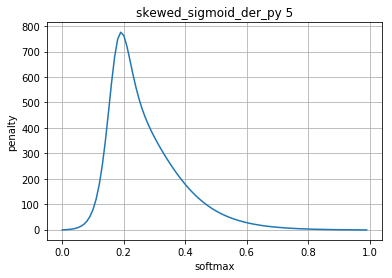

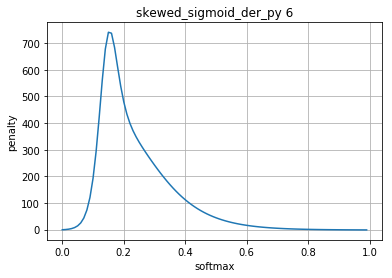

In [229]:
plot(skewed_sigmoid_der_py, 2)
plot(skewed_sigmoid_der_py, 3)
plot(skewed_sigmoid_der_py, 4)
plot(skewed_sigmoid_der_py, 5)
plot(skewed_sigmoid_der_py, 6)

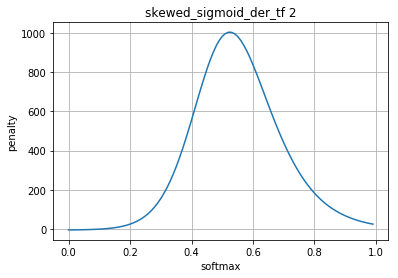

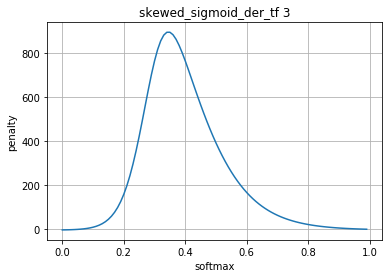

KeyboardInterrupt: 

In [267]:
plot(skewed_sigmoid_der_tf, 2)
plot(skewed_sigmoid_der_tf, 3)
plot(skewed_sigmoid_der_tf, 4)
plot(skewed_sigmoid_der_tf, 5)
plot(skewed_sigmoid_der_tf, 6)

In [284]:
t = np.arange(0.0, 1.01, 0.01)
for val in t:
    print (val, skewed_sigmoid_der_py(val, 5, 10))

0.0 0.9075939812812721
0.01 1.4517427520633766
0.02 2.3153266743725895
0.03 3.6805348206769395
0.04 5.829100875309193
0.05 9.192825668276845
0.06 14.425938904024534
0.07 22.504538742922346
0.08 34.85419754364005
0.09 53.49393609426291
0.1 81.15425796766125
0.11 121.26658101524129
0.12 177.62474070099728
0.13 253.41731697838304
0.14 349.35679913718855
0.15 461.07427820566176
0.16 577.0424673893177
0.17 679.4775514979115
0.18 750.0
0.19 777.9189030768927
0.2 765.1297972750001
0.21 723.6467390908338
0.22 668.4407383858885
0.23 611.3722246596725
0.24 559.0788128379357
0.25 513.8542966106685
0.26 475.46193949843484
0.27 442.6317893610853
0.28 413.9328499772676
0.29 388.15428422955006
0.3 364.4065160795116
0.31 342.096210123224
0.32 320.8603629433735
0.33 300.4983070768665
0.34 280.9155492243832
0.35 262.08202228608525
0.36 244.00302016433986
0.37 226.6999693271103
0.38 210.1983340220071
0.39 194.5204762991838
0.4 179.68184480107988
0.41 165.68933038339244
0.42 152.54098113550958
0.43 140.22